In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [64]:
class DBSCAN:
    def __init__(self,eps,minpts):
        self.eps=eps
        self.minpts=minpts
        self.cluster=None
        self.data_type=None
        self.x=None

    def fit(self,x):
        #initializing
        c = 0
        self.x=x
        self.cluster=-np.ones((x.shape[0],))
        self.data_type=np.zeros((x.shape[0],))
        for i in range(x.shape[0]):
            if self.cluster[i] == -1:
                norm = np.linalg.norm(x[i,:]-x, axis = 1)
                neighbors_index = norm < self.eps
                if np.size(np.where(neighbors_index)) >= self.minpts:
                    c += 1
                    self.cluster[i]=c
                    self.data_type[i]=2
                    self.create_cluster(neighbors_index,c)
                else:
                    self.cluster[i] = 0
        return {'cluster':self.cluster,'type':self.data_type}

    def create_cluster(self,neighbors_index,c):
        neighbors = self.x[neighbors_index]
        ind=np.where(neighbors_index)[0]
        for i in range(neighbors.shape[0]):
            if self.cluster[ind[i]]==-1 or self.cluster[ind[i]]==0:
                self.cluster[ind[i]]=c
                norm = np.linalg.norm(self.x[ind[i]] - self.x, axis=1)
                neigh_ind=norm < self.eps
                if np.size(np.where(neigh_ind)) >= self.minpts:
                    self.data_type[i] = 2
                    self.create_cluster(neigh_ind, c)
                else:
                    self.data_type[i] = 1

In [175]:
x,y=datasets.make_moons(n_samples=300,noise=0.1)

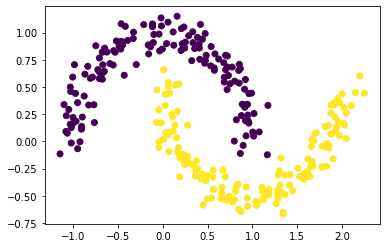

In [176]:
plt.scatter(x[:,0],x[:,1],c=y)

In [195]:
model=DBSCAN(eps=0.17,minpts=3)

In [196]:
result=model.fit(x)

In [197]:
cluster=result.get('cluster')
dtype=result.get('type')

In [198]:
cluster

array([1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
       2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1.,
       2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
       1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2.,
       2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2.,
       1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
       2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1.,
       1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 2., 0., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2.,
       1., 2., 1., 1., 2.

In [199]:
dtype

array([1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

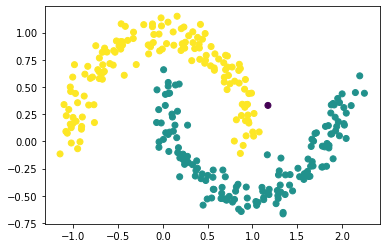

In [200]:
plt.scatter(x[:,0],x[:,1],c=cluster)

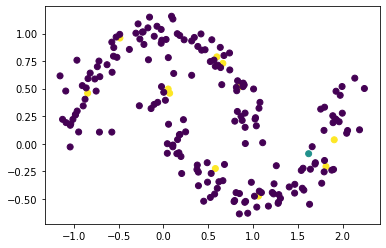

In [169]:
plt.scatter(x[:,0],x[:,1],c=dtype)

In [108]:
from sklearn.cluster import DBSCAN as dsc

In [218]:
clt=dsc(eps=0.17,min_samples=3)

In [219]:
clt.fit(x)

DBSCAN(eps=0.17, min_samples=3)

In [220]:
l=clt.labels_

In [221]:
l

array([ 0,  0,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,
        1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,
        1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
        0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  1,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,
        0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  1,  0,
        0,  0,  1,  1,  0,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        0,  1,  0,  0,  1,  1,  1,  0,  0,  1,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  0,  0,  1

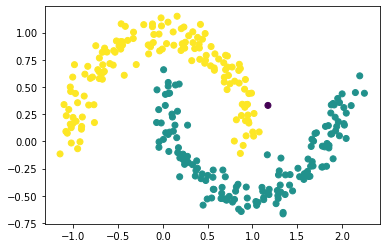

In [222]:
plt.scatter(x[:,0],x[:,1],c=l)